In [1]:
import numpy as np
import pandas as pd
import cv2
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout, ZeroPadding2D, Input
from tensorflow.keras.utils import to_categorical

In [2]:
import random

def random_select(X, y):
    random_X = []
    random_y = []
    
    num_of_pic = X.shape[0]
    nums = num_of_pic
    nums = [i for i in range(nums)]
    
    for i in range(num_of_pic):
            num = random.choice(nums)
            random_X.append(X[num])
            random_y.append(y[num])
            nums.remove(num)
            
    return np.array(random_X), np.array(random_y)

In [4]:
name_list = ['amir', 'amir_hoseini','ashkan','davari','khara','mohammad',
             'mosadegh','mostafa','nahang','rahim','taherkhoo']
X_train = []
y_train = []
for i in range(len(name_list)):
    for j in range(1,14):
        image = cv2.imread(f'{name_list[i]}/train/{j}.jpg', 0)
        image = cv2.resize(image, (400,400))
#         cv2.imshow('',image)
#         cv2.waitKey()
#         cv2.destroyAllWindows()
        X_train.append(image)
        y_train.append(i)
        

X_test = []
y_test = []
for i in range(len(name_list)):
    for j in range(1,9):
        image = cv2.imread(f'{name_list[i]}/train/{j}.jpg', 0)
        image = cv2.resize(image, (400,400))
#         cv2.imshow('',image)
#         cv2.waitKey()
#         cv2.destroyAllWindows()
        X_test.append(image)
        y_test.append(i)
        
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)  

X_train , y_train = random_select(X_train, y_train)
X_test , y_test = random_select(X_test, y_test)


X_train_scale = X_train / 255
X_test_scale = X_test / 255

print(y_test)
print(y_test.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.shape)

[ 1  0 10 10  8  8  7  1  7 10 10  1  9  4  0  6  2  9  0  0  4  4  2  1
  8  7  0  9  8  0  8  2  5  5  2  5  7  6 10  3  6  3  2  7  6  9  1  6
  8  4  7  3  9  6  5  5  3  2  1  7  6  5  9  7  1  5  3  3  4  4  4  9
  8  9  2  0  8 10  3  5 10  6 10  0  4  1  2  3]
(88,)
(88, 400, 400)
(143,)
(143, 400, 400)


In [5]:
X_test_col3 = np.expand_dims(X_test, axis=3)
X_train_col3 = np.expand_dims(X_train, axis=3)
print(X_test_col3.shape)
print(X_train_col3.shape)

(88, 400, 400, 1)
(143, 400, 400, 1)


In [6]:
X_test_col3

array([[[[226],
         [226],
         [226],
         ...,
         [226],
         [226],
         [226]],

        [[226],
         [226],
         [226],
         ...,
         [226],
         [226],
         [226]],

        [[226],
         [226],
         [226],
         ...,
         [226],
         [226],
         [226]],

        ...,

        [[216],
         [216],
         [216],
         ...,
         [180],
         [180],
         [180]],

        [[217],
         [217],
         [217],
         ...,
         [181],
         [181],
         [181]],

        [[217],
         [217],
         [217],
         ...,
         [180],
         [180],
         [180]]],


       [[[138],
         [138],
         [138],
         ...,
         [102],
         [102],
         [102]],

        [[138],
         [138],
         [138],
         ...,
         [102],
         [102],
         [102]],

        [[138],
         [138],
         [138],
         ...,
         [101],
         [

In [7]:
y_train_col1 = to_categorical(y_train)
y_test_col1 = to_categorical(y_test)
print(y_train_col1.shape)
print(y_test_col1.shape)
print(y_test_col1[18])

(143, 11)
(88, 11)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
model = Sequential([
    Input(shape=(400,400,1)),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(128, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.4),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    ZeroPadding2D(padding=(1,1)),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(11,activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 402, 402, 1)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 400, 400, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 200, 200, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 200, 128)     0         
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 202, 202, 128)     0         
 ing2D)                                                          
                                                        

In [10]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_col3, y_train_col1, batch_size=10, epochs=100, validation_data=(X_test_col3,y_test_col1))

Epoch 1/100
15/15 [==============================] - 62s 4s/step - loss: 14.0938 - accuracy: 0.0909 - val_loss: 2.3937 - val_accuracy: 0.1705
Epoch 2/100
15/15 [==============================] - 60s 4s/step - loss: 2.5720 - accuracy: 0.0909 - val_loss: 2.3979 - val_accuracy: 0.0568
Epoch 3/100
15/15 [==============================] - 60s 4s/step - loss: 2.3910 - accuracy: 0.1119 - val_loss: 2.3979 - val_accuracy: 0.1477
Epoch 4/100
15/15 [==============================] - 60s 4s/step - loss: 2.4291 - accuracy: 0.1049 - val_loss: 2.3980 - val_accuracy: 0.1136
Epoch 5/100
15/15 [==============================] - 60s 4s/step - loss: 2.4053 - accuracy: 0.0839 - val_loss: 2.3978 - val_accuracy: 0.0909
Epoch 6/100
15/15 [==============================] - 60s 4s/step - loss: 2.4077 - accuracy: 0.0769 - val_loss: 2.3980 - val_accuracy: 0.0909
Epoch 7/100
15/15 [==============================] - 60s 4s/step - loss: 2.3913 - accuracy: 0.1189 - val_loss: 2.3980 - val_accuracy: 0.0909
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 61s 4s/step - loss: 2.3851 - accuracy: 0.1189 - val_loss: 2.3881 - val_accuracy: 0.1364
Epoch 60/100
15/15 [==============================] - 60s 4s/step - loss: 2.3905 - accuracy: 0.1329 - val_loss: 2.3902 - val_accuracy: 0.1364
Epoch 61/100
15/15 [==============================] - 60s 4s/step - loss: 2.3924 - accuracy: 0.1189 - val_loss: 2.3972 - val_accuracy: 0.0909
Epoch 62/100
15/15 [==============================] - 60s 4s/step - loss: 2.3957 - accuracy: 0.1119 - val_loss: 2.3981 - val_accuracy: 0.0909
Epoch 63/100
15/15 [==============================] - 60s 4s/step - loss: 2.3952 - accuracy: 0.1399 - val_loss: 2.3987 - val_accuracy: 0.0909
Epoch 64/100
15/15 [==============================] - 60s 4s/step - loss: 2.4016 - accuracy: 0.1049 - val_loss: 2.3986 - val_accuracy: 0.0909
Epoch 65/100
15/15 [==============================] - 60s 4s/step - loss: 2.3838 - accuracy: 0.1399 - val_loss: 2.3940 - val_accuracy: 0.1818
Epoch 

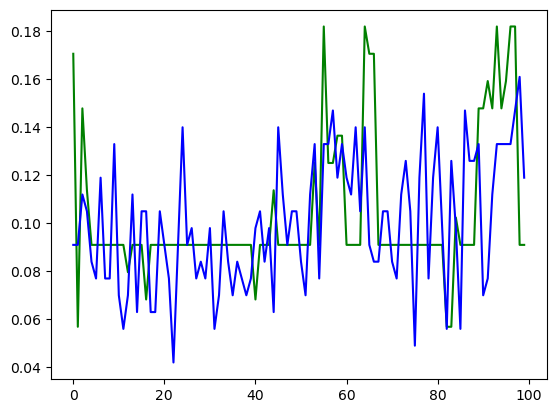

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'], color='green')
plt.plot(history.history['accuracy'], color='blue')

In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_col3)
y_pred_correct = []
name = ''

for i in range(len(y_pred)):
    value = np.argmax(y_pred[i])
    name = name_list[value]
    y_pred_correct.append(value)
    
    image = X_test[i]
    cv2.imshow(name, image)
    cv2.waitKey()
    cv2.destroyAllWindows()
    


3/3 [==============================] - 7s 2s/step


In [13]:
print(classification_report(y_true=y_test, y_pred=y_pred_correct))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8
           5       0.09      1.00      0.17         8
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         8

    accuracy                           0.09        88
   macro avg       0.01      0.09      0.02        88
weighted avg       0.01      0.09      0.02        88



E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#(0:amir) (1:amir_hoseini) (2:ashkan) (3:davari) (4:khara) 
#(5:mohammad) (6:mosadegh) (7:nahang) (8:taherkhoo) (9:rahim) (10:mostafa)

In [120]:
import tensorflow

model.save_weights(r'C:\Users\352\Desktop\credit_student_picture')